<a href="https://colab.research.google.com/github/Qianru69/Wind-Prediction/blob/ERA5-EDA/ERA5_ERD_BayArea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import and install libraries

In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install ecmwflibs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 MB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for findlibs: filename=findlibs-0.0.5-py3-none-any.whl size=6941 sha256=34a003e47dc468933d63612abe8d5d90a8e660f0da3f5d314b221d8d7c0d006d
  Stored in directory: /root/.cache/pip/wheels/2e/67/14/22fa5b9fd9c41be520b37e908597d6a262803c0fcf2ba7c2c3
Successfully built findlibs


In [4]:
!pip install cfgrib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 38.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eccodes: filename=eccodes-1.7.0-py3-none-any.whl size=41293 sha256=76371ee9f9dbf6f4bdb1f46013d874d0d985b984121e54e5e0ca333bba30e41f
  Stored in directory: /root/.cache/pip/wheels/44/16/96/7b9c3092abbd09c79444ba34e07106bc0992eb1c9e05fd58f3
Successfully built eccodes


In [5]:
import cfgrib

ds = cfgrib.open_datasets('/content/drive/MyDrive/CS 663 - Project/Datasets/ERA5 Bay Area/adaptor.mars.internal-1711063394.5946288-7816-1-ff9dc8b7-1687-415c-9666-67ccb9f3bd47.grib')


In [6]:
ds

[<xarray.Dataset>
 Dimensions:     (time: 731, step: 12, latitude: 17, longitude: 17)
 Coordinates:
     number      int64 0
   * time        (time) datetime64[ns] 2022-12-31T18:00:00 ... 2023-12-31T18:0...
   * step        (step) timedelta64[ns] 01:00:00 02:00:00 ... 11:00:00 12:00:00
     surface     float64 0.0
   * latitude    (latitude) float64 40.0 39.75 39.5 39.25 ... 36.5 36.25 36.0
   * longitude   (longitude) float64 -124.0 -123.8 -123.5 ... -120.2 -120.0
     valid_time  (time, step) datetime64[ns] 2022-12-31T19:00:00 ... 2024-01-0...
 Data variables:
     fg10        (time, step, latitude, longitude) float32 ...
     ewss        (time, step, latitude, longitude) float32 ...
     nsss        (time, step, latitude, longitude) float32 ...
     lgws        (time, step, latitude, longitude) float32 ...
     mgws        (time, step, latitude, longitude) float32 ...
     i10fg       (time, step, latitude, longitude) float32 ...
 Attributes:
     GRIB_edition:            1
     GRI

## EDA Analysis of ERA5 Bay Area Wind dataset

> Add blockquote



Xarray dataset

In [7]:
# Load the dataset
data = ds[1]
data.head()

<xarray.Dataset>
Dimensions:     (time: 5, latitude: 5, longitude: 5)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 2023-01-01 ... 2023-01-01T04:00:00
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 40.0 39.75 39.5 39.25 39.0
  * longitude   (longitude) float64 -124.0 -123.8 -123.5 -123.2 -123.0
    valid_time  (time) datetime64[ns] 2023-01-01 ... 2023-01-01T04:00:00
Data variables:
    u10         (time, latitude, longitude) float32 ...
    v10         (time, latitude, longitude) float32 ...
    t2m         (time, latitude, longitude) float32 ...
    u10n        (time, latitude, longitude) float32 ...
    v10n        (time, latitude, longitude) float32 ...
    u100        (time, latitude, longitude) float32 ...
    v100        (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts

In [8]:
data.info()

xarray.Dataset {
dimensions:
	time = 8760 ;
	latitude = 17 ;
	longitude = 17 ;

variables:
	int64 number() ;
		number:long_name = ensemble member numerical id ;
		number:units = 1 ;
		number:standard_name = realization ;
	datetime64[ns] time(time) ;
		time:long_name = initial time of forecast ;
		time:standard_name = forecast_reference_time ;
	timedelta64[ns] step() ;
		step:long_name = time since forecast_reference_time ;
		step:standard_name = forecast_period ;
	float64 surface() ;
		surface:long_name = original GRIB coordinate for key: level(surface) ;
		surface:units = 1 ;
	float64 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:standard_name = latitude ;
		latitude:long_name = latitude ;
		latitude:stored_direction = decreasing ;
	float64 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:standard_name = longitude ;
		longitude:long_name = longitude ;
	datetime64[ns] valid_time(time) ;
		valid_time:standard_name = time ;
		valid_time:long_name

In [9]:
variables = ['u10', 'v10', 'u10n', 'v10n', 'u100', 'v100', 't2m']
data[variables].isnull().sum()

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    number   int64 0
    step     timedelta64[ns] 00:00:00
    surface  float64 0.0
Data variables:
    u10      int64 0
    v10      int64 0
    u10n     int64 0
    v10n     int64 0
    u100     int64 0
    v100     int64 0
    t2m      int64 0

In [8]:
ds = data.rename({'u10': 'East_Wind_10m', 'v10': 'North_Wind_10m', 'u10n': 'East_Neutral_Wind_10m', 'v10n': 'North_Neutral_Wind_10m', 'u100': 'East_Wind_100m', 'v100': 'North_Wind_100m', 't2m': 'Temperature_2m'})

In [11]:
df = ds.to_dataframe()
df.describe()

,number,step,surface,valid_time,East_Wind_10m,North_Wind_10m,Temperature_2m,East_Neutral_Wind_10m,North_Neutral_Wind_10m,East_Wind_100m,North_Wind_100m
count,2531640.0,2531640,2531640.0,2531640,2.531640e+06,2.531640e+06,2.531640e+06,2.531640e+06,2.531640e+06,2.531640e+06,2.531640e+06
mean,0.0,0 days 00:00:00,0.0,2023-07-02 11:29:59.999999488,1.139350e+00,-8.620688e-01,2.872567e+02,1.150613e+00,-8.605366e-01,1.522424e+00,-1.009866e+00
min,0.0,0 days 00:00:00,0.0,2023-01-01 00:00:00,-1.511830e+01,-1.739758e+01,2.542444e+02,-1.517670e+01,-1.754402e+01,-2.122575e+01,-2.135942e+01
25%,0.0,0 days 00:00:00,0.0,2023-04-02 05:45:00,-5.862007e-01,-2.132965e+00,2.831150e+02,-3.972206e-01,-2.079269e+00,-6.125793e-01,-3.417130e+00
50%,0.0,0 days 00:00:00,0.0,2023-07-02 11:30:00,1.055542e+00,-3.957672e-01,2.866028e+02,8.642426e-01,-2.793732e-01,1.546852e+00,-5.771484e-01
75%,0.0,0 days 00:00:00,0.0,2023-10-01 17:15:00,2.587219e+00,1.073196e+00,2.904604e+02,2.631226e+00,9.076233e-01,3.616165e+00,1.705219e+00
max,0.0,0 days 00:00:00,0.0,2023-12-31 23:00:00,1.560823e+01,1.877602e+01,3.205295e+02,1.573405e+01,1.866849e+01,1.884879e+01,2.559276e+01
std,0.0,0 days 00:00:00,0.0,NaN,2.586171e+00,3.625813e+00,7.517238e+00,2.566910e+00,3.620737e+00,3.408759e+00,4.926739e+00


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2531640 entries, (Timestamp('2023-01-01 00:00:00'), 40.0, -124.0) to (Timestamp('2023-12-31 23:00:00'), 36.0, -120.0)
Data columns (total 11 columns):
 #   Column                  Dtype          
---  ------                  -----          
 0   number                  int64          
 1   step                    timedelta64[ns]
 2   surface                 float64        
 3   valid_time              datetime64[ns] 
 4   East_Wind_10m           float32        
 5   North_Wind_10m          float32        
 6   Temperature_2m          float32        
 7   East_Neutral_Wind_10m   float32        
 8   North_Neutral_Wind_10m  float32        
 9   East_Wind_100m          float32        
 10  North_Wind_100m         float32        
dtypes: datetime64[ns](1), float32(7), float64(1), int64(1), timedelta64[ns](1)
memory usage: 154.8 MB


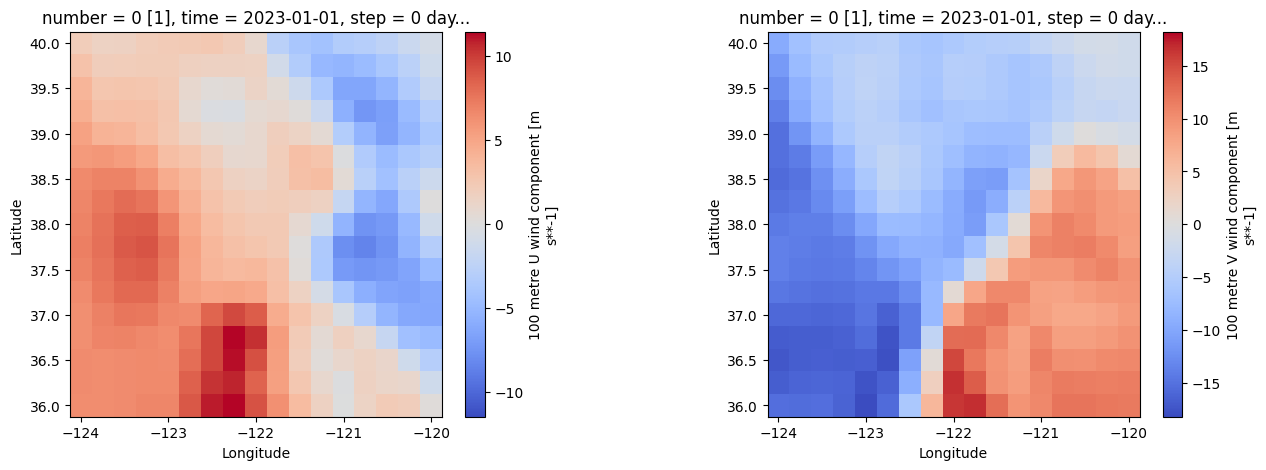

In [9]:
import matplotlib.pyplot as plt

# Set up a figure with two subplots (vertically arranged)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.5)

# First subplot for Wind_Speed
axs[0].set_title('Eastward Speed', y=10)
# Assuming the first time slice, adjust as necessary
ds.East_Wind_100m[0].plot(ax=axs[0], x='longitude', y='latitude', cmap='coolwarm')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')

# Second subplot for Wind Direction Sine Component
axs[1].set_title('Northward Speed', y=10)
# Adjust for the right component and time slice as necessary
ds.North_Wind_100m[0].plot(ax=axs[1], x='longitude', y='latitude', cmap='coolwarm')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')

# Show the plot
plt.show()

In [10]:
import numpy as np

# Calculate Wind Speed
ds['Wind_Speed_100'] = np.sqrt(ds['North_Wind_100m']**2 + ds['East_Wind_100m']**2)
ds['Wind_Speed_10'] = np.sqrt(ds['North_Wind_10m']**2 + ds['East_Wind_10m']**2)
ds['Neutral_Wind_Speed_10'] = np.sqrt(ds['North_Neutral_Wind_10m']**2 + ds['East_Neutral_Wind_10m']**2)

# Calculate Wind Direction in degrees from the north
ds['Wind_Dir_100'] = np.arctan2(ds.East_Wind_100m, ds.North_Wind_100m) * (180 / np.pi)
ds['Wind_Dir_10'] = np.arctan2(ds.East_Wind_10m, ds.North_Wind_10m) * (180 / np.pi)
ds['Neutral_Wind_Dir_10'] = np.arctan2(ds.East_Neutral_Wind_10m, ds.North_Neutral_Wind_10m) * (180 / np.pi)

# Adjust Wind Direction so that north is 0° and east is 90°
ds['Wind_Dir_100'] = (360 + ds['Wind_Dir_100']) % 360
ds['Wind_Dir_10'] = (360 + ds['Wind_Dir_10']) % 360
ds['Neutral_Wind_Dir_10'] = (360 + ds['Neutral_Wind_Dir_10']) % 360

# Convert wind direction from degrees to radians
wind_dir_rad_100 = np.deg2rad(ds['Wind_Dir_100'])
wind_dir_rad_10 = np.deg2rad(ds['Wind_Dir_10'])
neutral_wind_dir_rad_10 = np.deg2rad(ds['Neutral_Wind_Dir_10'])

# Calculate the sine and cosine components
ds['Wind_Dir_100_Sin'] = np.sin(wind_dir_rad_100)
ds['Wind_Dir_100_Cos'] = np.cos(wind_dir_rad_100)
ds['Wind_Dir_10_Sin'] = np.sin(wind_dir_rad_10)
ds['Wind_Dir_10_Cos'] = np.cos(wind_dir_rad_10)
ds['Neutral_Wind_Dir_10_Sin'] = np.sin(neutral_wind_dir_rad_10)
ds['Neutral_Wind_Dir_10_Cos'] = np.cos(neutral_wind_dir_rad_10)

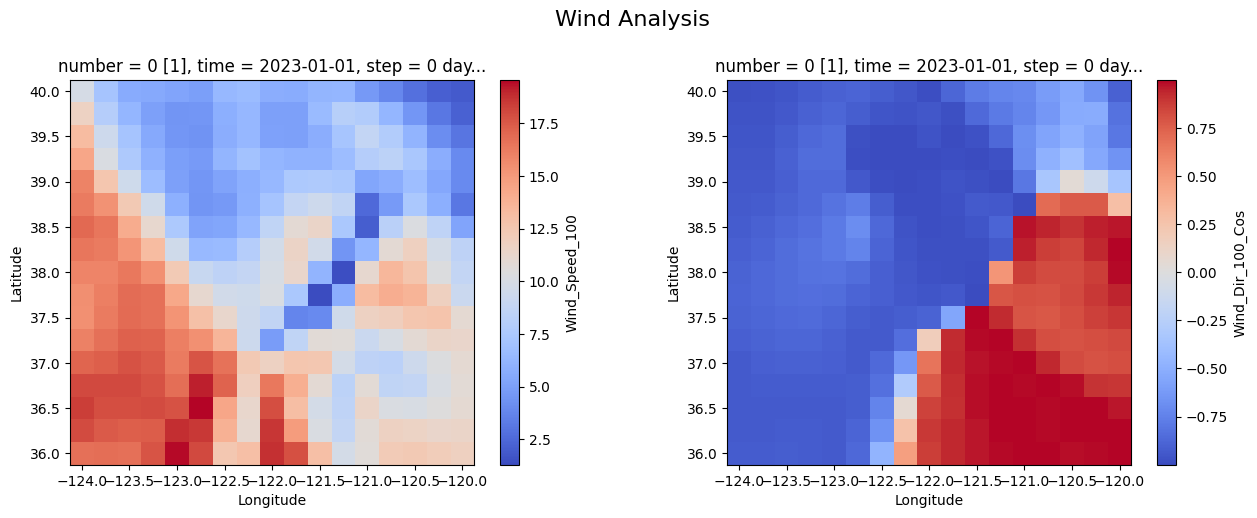

In [11]:
import matplotlib.pyplot as plt

# Set up a figure with two subplots (vertically arranged)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.3)
fig.suptitle('Wind Analysis', fontsize=16, y=1.02)

axs[0].set_title('Wind Speed')
ds['Wind_Speed_100'][0].plot(ax=axs[0], x='longitude', y='latitude', cmap='coolwarm')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')

axs[1].set_title('Wind Direction Sin')
ds['Wind_Dir_100_Cos'][0].plot(ax=axs[1], x='longitude', y='latitude', cmap='coolwarm')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')

# Show the plot
plt.show()

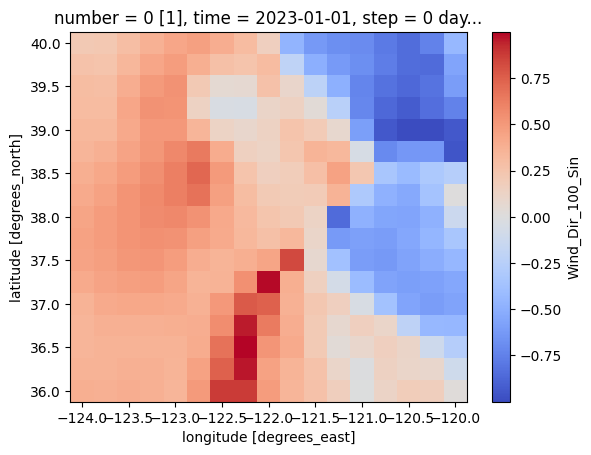

In [12]:
# Plot for a single time point
# By value
ds.Wind_Dir_100_Sin.sel(time='2023-01-01T00:00:00.000000000').plot(y='latitude', cmap='coolwarm')

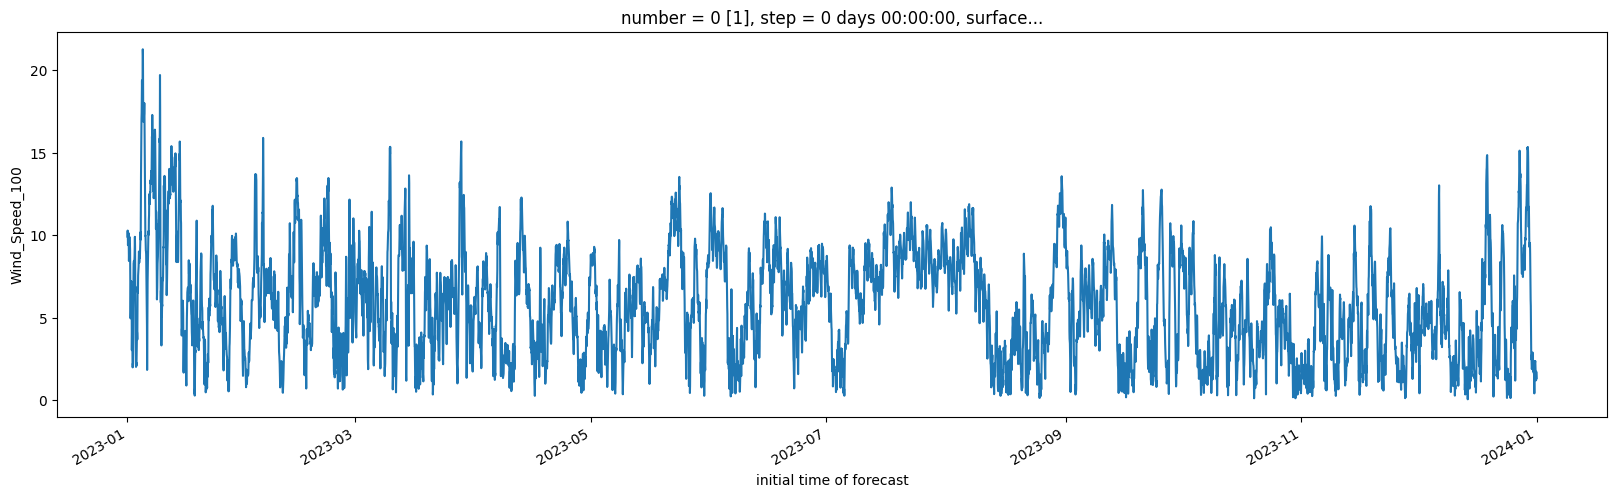

In [25]:
# Plot for all time point, but a single latitude x longitude
# with index
ds.Wind_Speed_100[:, 0, 0].plot(figsize=(20, 5))

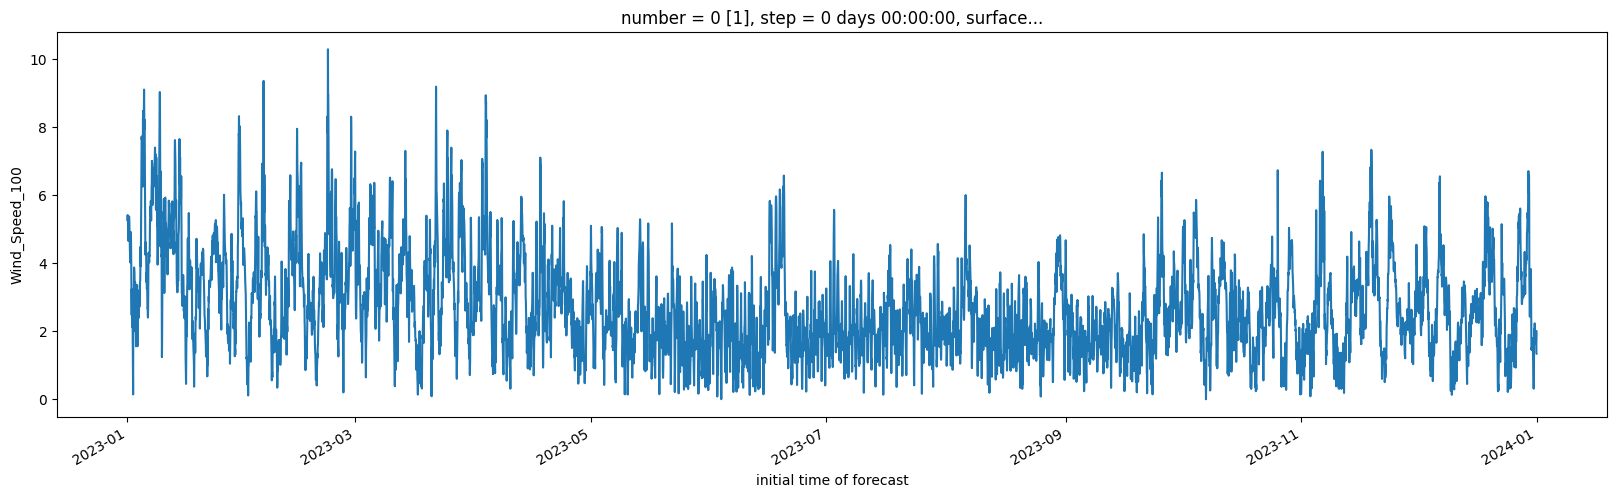

In [26]:
# Plot for all time point, but a single latitude x longitude
# with values
ds.Wind_Speed_100.sel(latitude=40, longitude =-123).plot(figsize=(20, 5))

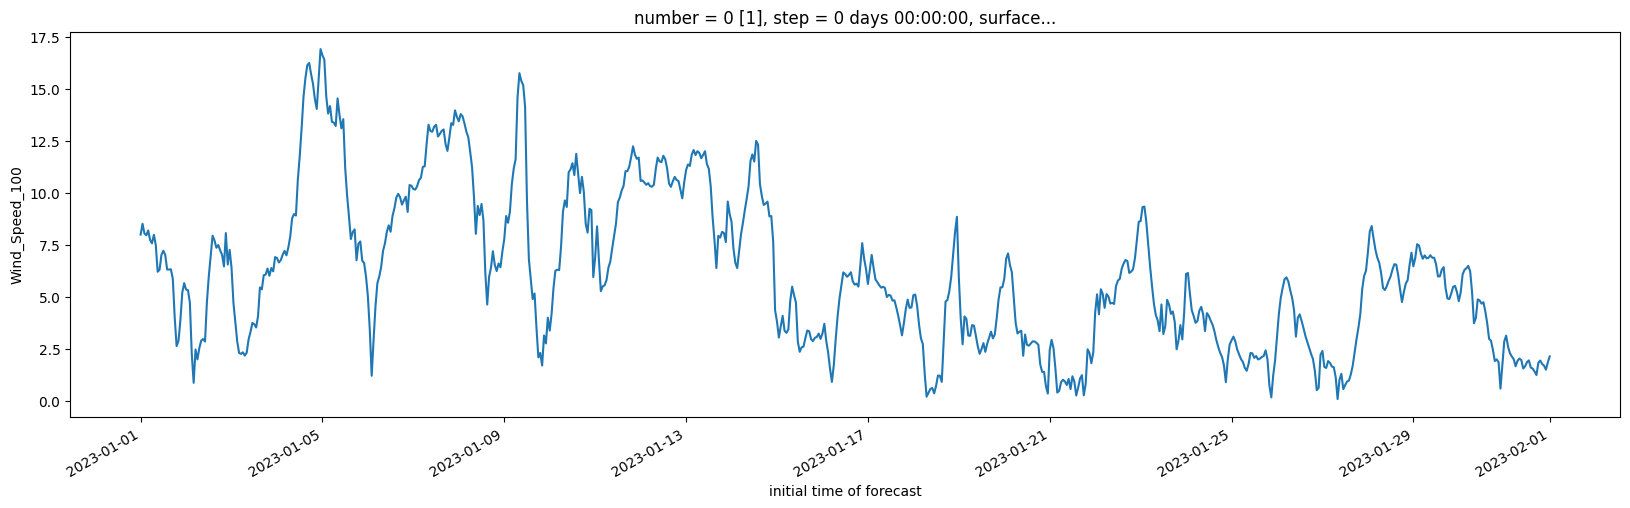

In [27]:
# Select a certain range of data
sliced = ds.sel(time=slice('2023-01-01T00:00:00.000000000', '2023-02-01T00:00:00.000000000'))
sliced.Wind_Speed_100[:, 1, 1].plot(figsize=(20, 5))

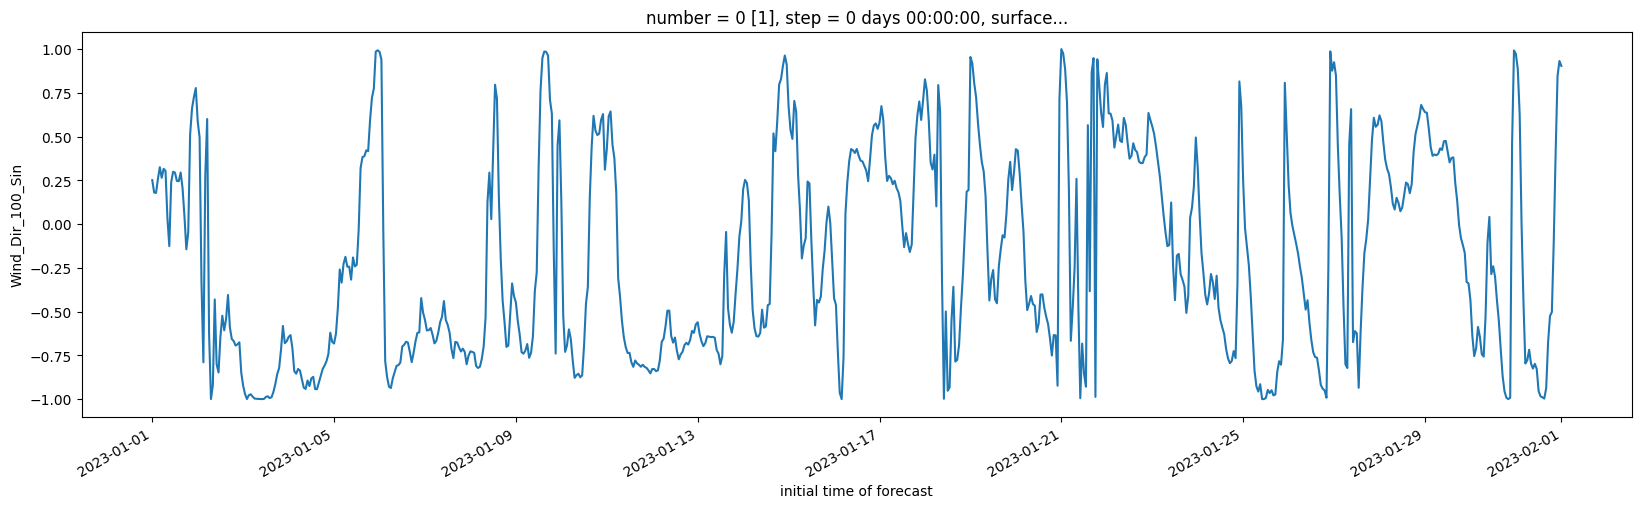

In [29]:
sliced.Wind_Dir_100_Sin[:, 1, 1].plot(figsize=(20, 5))

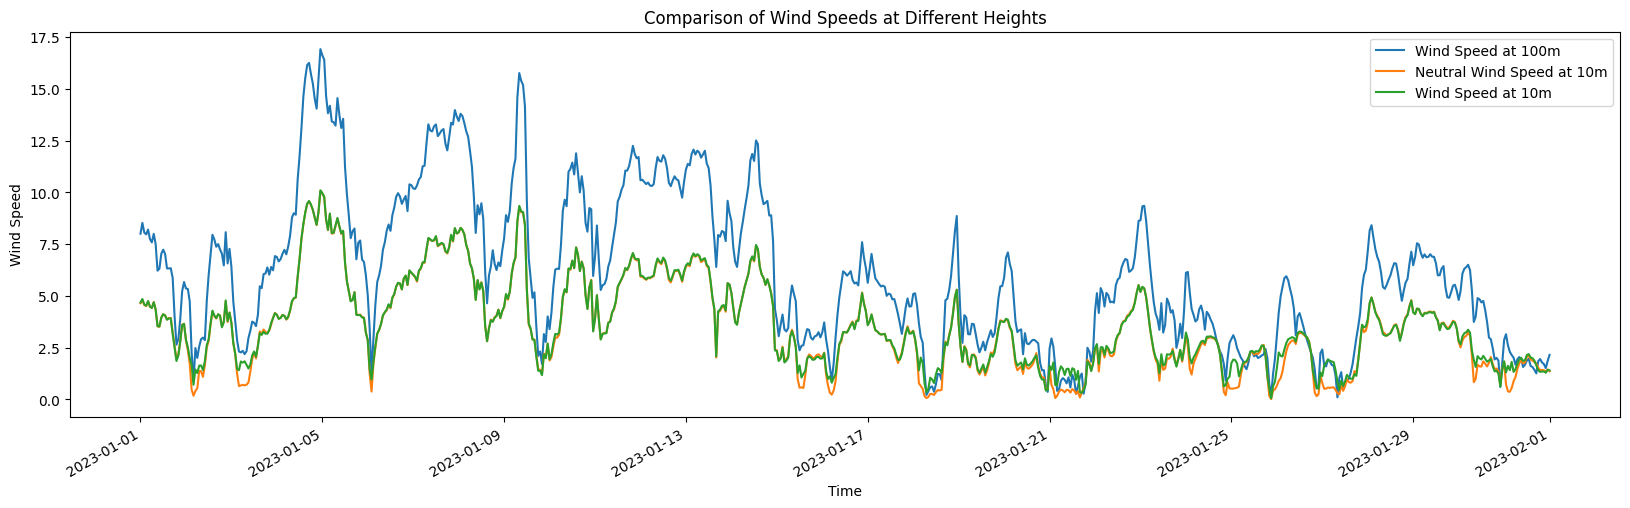

In [39]:
# Create the plot
plt.figure(figsize=(20, 5))
sliced.Wind_Speed_100[:, 1, 1].plot(label='Wind Speed at 100m')
sliced.Neutral_Wind_Speed_10[:, 1, 1].plot(label='Neutral Wind Speed at 10m')
sliced.Wind_Speed_10[:, 1, 1].plot(label='Wind Speed at 10m')

# Adding some plot details
plt.title('Comparison of Wind Speeds at Different Heights')
plt.xlabel('Time')  # Adjust this label as necessary
plt.ylabel('Wind Speed')  # Adjust this label as necessary
plt.legend()

# Show the plot
plt.show()

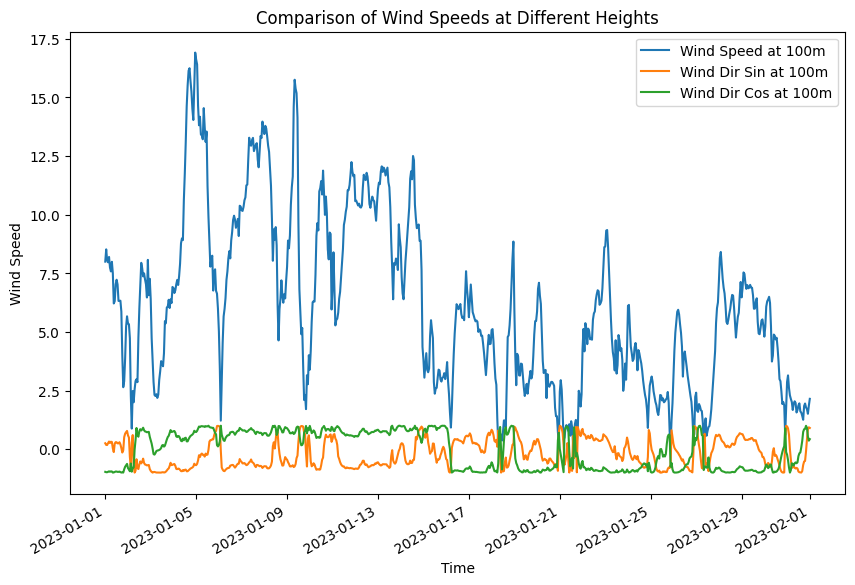

In [30]:
plt.figure(figsize=(10, 6))
sliced.Wind_Speed_100[:, 1, 1].plot(label='Wind Speed at 100m')
sliced.Wind_Dir_100_Sin[:, 1, 1].plot(label='Wind Dir Sin at 100m')
sliced.Wind_Dir_100_Cos[:, 1, 1].plot(label='Wind Dir Cos at 100m')

# Adding some plot details
plt.title('Comparison of Wind Speeds at Different Heights')
plt.xlabel('Time')  # Adjust this label as necessary
plt.ylabel('Wind Speed')  # Adjust this label as necessary
plt.legend()

# Show the plot
plt.show()

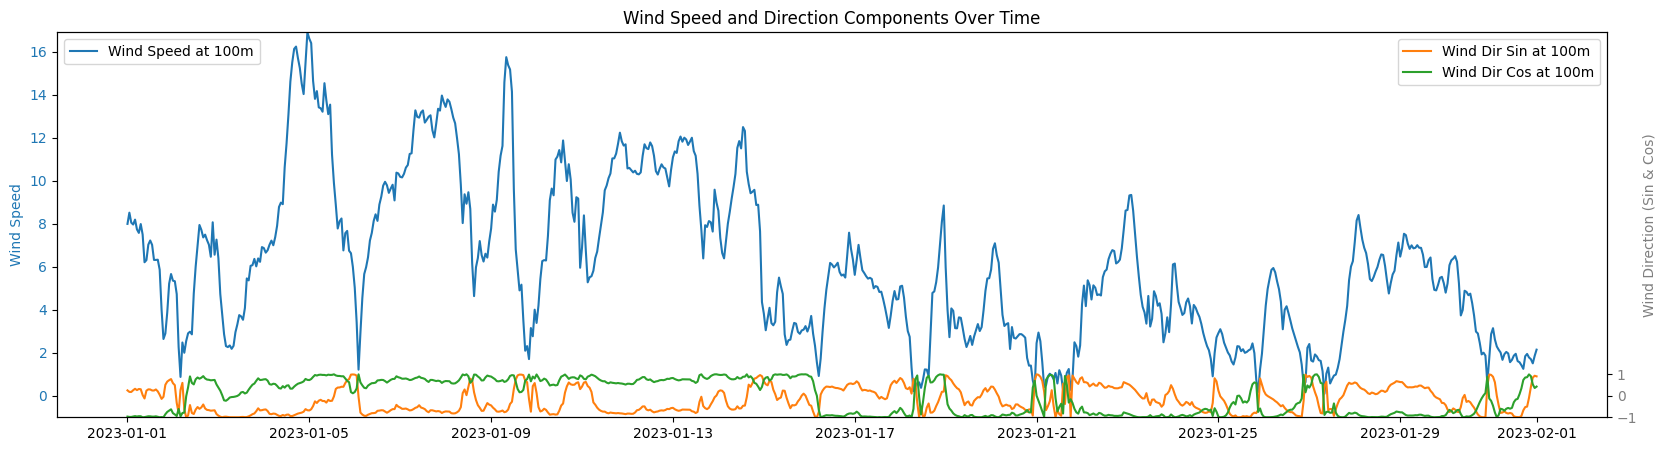

In [45]:
# Create a figure and a primary y-axis
fig, ax1 = plt.subplots(figsize=(20, 5))

color_speed = 'tab:blue'
ax1.plot(sliced.time, sliced.Wind_Speed_100[:, 1, 1], label='Wind Speed at 100m', color=color_speed)

# Setting labels for the second y-axis
ax1.set_ylabel('Wind Speed', color=color_speed)
ax1.tick_params(axis='y', labelcolor=color_speed)

# Create a secondary y-axis (ax2) for Wind Speed
ax2 = ax1.twinx()
# Plot Wind Direction Sine and Cosine components on the primary y-axis (ax1)
color_sin = 'tab:orange'
ax2.plot(sliced.time, sliced.Wind_Dir_100_Sin[:, 1, 1], label='Wind Dir Sin at 100m', color=color_sin)
color_cos = 'tab:green'
ax2.plot(sliced.time, sliced.Wind_Dir_100_Cos[:, 1, 1], label='Wind Dir Cos at 100m', color=color_cos)

# Setting labels for the first y-axis
ax2.set_xlabel('Time')
ax2.set_ylabel('Wind Direction (Sin & Cos)', color='tab:gray')
ax2.tick_params(axis='y', labelcolor='tab:gray')
ax2.set_yticks([-1, 0, 1])



# Manually set the same y-axis limits for both axes
# Determine limits based on desired scale or data range
y_limits = (-1, max(sliced.Wind_Speed_100[:, 1, 1].max(), 1))  # Example limits; adjust as needed
ax1.set_ylim(y_limits)
ax2.set_ylim(y_limits)

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add a title
plt.title('Wind Speed and Direction Components Over Time')

# Show the plot
plt.show()

In [14]:
ds.head()

<xarray.Dataset>
Dimensions:                  (time: 5, latitude: 5, longitude: 5)
Coordinates:
    number                   int64 0
  * time                     (time) datetime64[ns] 2023-01-01 ... 2023-01-01T...
    step                     timedelta64[ns] 00:00:00
    surface                  float64 0.0
  * latitude                 (latitude) float64 40.0 39.75 39.5 39.25 39.0
  * longitude                (longitude) float64 -124.0 -123.8 ... -123.2 -123.0
    valid_time               (time) datetime64[ns] 2023-01-01 ... 2023-01-01T...
Data variables: (12/19)
    East_Wind_10m            (time, latitude, longitude) float32 1.707 ... 1.089
    North_Wind_10m           (time, latitude, longitude) float32 -6.523 ... -...
    Temperature_2m           (time, latitude, longitude) float32 ...
    East_Neutral_Wind_10m    (time, latitude, longitude) float32 1.71 ... 1.018
    North_Neutral_Wind_10m   (time, latitude, longitude) float32 -6.534 ... -...
    East_Wind_100m           (time, latitude, longitude) float32 2.101 ... 2.294
    ...                       ...
    Wind_Dir_100_Sin         (time, latitude, longitude) float32 0.212 ... 0....
    Wind_Dir_100_Cos         (time, latitude, longitude) float32 -0.9773 ... ...
    Wind_Dir_10_Sin          (time, latitude, longitude) float32 0.2531 ... 0...
    Wind_Dir_10_Cos          (time, latitude, longitude) float32 -0.9674 ... ...
    Neutral_Wind_Dir_10_Sin  (time, latitude, longitude) float32 0.2532 ... 0...
    Neutral_Wind_Dir_10_Cos  (time, latitude, longitude) float32 -0.9674 ... ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts

In [48]:
df = ds.to_dataframe()
df.describe()

,number,step,surface,valid_time,East_Wind_10m,North_Wind_10m,Temperature_2m,East_Neutral_Wind_10m,North_Neutral_Wind_10m,East_Wind_100m,...,Neutral_Wind_Speed_10,Wind_Dir_100,Wind_Dir_10,Neutral_Wind_Dir_10,Wind_Dir_100_Sin,Wind_Dir_100_Cos,Wind_Dir_10_Sin,Wind_Dir_10_Cos,Neutral_Wind_Dir_10_Sin,Neutral_Wind_Dir_10_Cos
count,2531640.0,2531640,2531640.0,2531640,2.531640e+06,2.531640e+06,2.531640e+06,2.531640e+06,2.531640e+06,2.531640e+06,...,2.531640e+06,2.531640e+06,2.531640e+06,2.531640e+06,2.531640e+06,2.531640e+06,2.531640e+06,2.531640e+06,2.531640e+06,2.531640e+06
mean,0.0,0 days 00:00:00,0.0,2023-07-02 11:29:59.999999488,1.139350e+00,-8.620688e-01,2.872567e+02,1.150613e+00,-8.605366e-01,1.522424e+00,...,3.497374e+00,1.615892e+02,1.609201e+02,1.607579e+02,2.496735e-01,-1.106281e-01,2.290916e-01,-1.053184e-01,2.289004e-01,-1.066920e-01
min,0.0,0 days 00:00:00,0.0,2023-01-01 00:00:00,-1.511830e+01,-1.739758e+01,2.542444e+02,-1.517670e+01,-1.754402e+01,-2.122575e+01,...,2.309074e-04,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,0.0,0 days 00:00:00,0.0,2023-04-02 05:45:00,-5.862007e-01,-2.132965e+00,2.831150e+02,-3.972206e-01,-2.079269e+00,-6.125793e-01,...,1.258785e+00,9.159310e+01,8.897162e+01,8.881039e+01,-2.679984e-01,-8.209807e-01,-3.694630e-01,-7.871845e-01,-3.740364e-01,-7.853329e-01
50%,0.0,0 days 00:00:00,0.0,2023-07-02 11:30:00,1.055542e+00,-3.957672e-01,2.866028e+02,8.642426e-01,-2.793732e-01,1.546852e+00,...,2.559696e+00,1.465958e+02,1.453523e+02,1.452804e+02,4.512368e-01,-2.718418e-01,4.621497e-01,-2.613424e-01,4.641686e-01,-2.649104e-01
75%,0.0,0 days 00:00:00,0.0,2023-10-01 17:15:00,2.587219e+00,1.073196e+00,2.904604e+02,2.631226e+00,9.076233e-01,3.616165e+00,...,4.611951e+00,2.250221e+02,2.347981e+02,2.351859e+02,7.855422e-01,6.446349e-01,8.022012e-01,6.075791e-01,8.033520e-01,6.030645e-01
max,0.0,0 days 00:00:00,0.0,2023-12-31 23:00:00,1.560823e+01,1.877602e+01,3.205295e+02,1.573405e+01,1.866849e+01,1.884879e+01,...,2.129796e+01,3.599994e+02,3.599998e+02,3.599992e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
std,0.0,0 days 00:00:00,0.0,NaN,2.586171e+00,3.625813e+00,7.517238e+00,2.566910e+00,3.620737e+00,3.408759e+00,...,3.087323e+00,9.600587e+01,9.533801e+01,9.513982e+01,6.342707e-01,7.232742e-01,6.664521e-01,7.016174e-01,6.682599e-01,6.997503e-01


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2531640 entries, (Timestamp('2023-01-01 00:00:00'), 40.0, -124.0) to (Timestamp('2023-12-31 23:00:00'), 36.0, -120.0)
Data columns (total 23 columns):
 #   Column                   Dtype          
---  ------                   -----          
 0   number                   int64          
 1   step                     timedelta64[ns]
 2   surface                  float64        
 3   valid_time               datetime64[ns] 
 4   East_Wind_10m            float32        
 5   North_Wind_10m           float32        
 6   Temperature_2m           float32        
 7   East_Neutral_Wind_10m    float32        
 8   North_Neutral_Wind_10m   float32        
 9   East_Wind_100m           float32        
 10  North_Wind_100m          float32        
 11  Wind_Speed_100           float32        
 12  Wind_Speed_10            float32        
 13  Neutral_Wind_Speed_10    float32        
 14  Wind_Dir_100             float32        
 15  Wind_Dir_10 

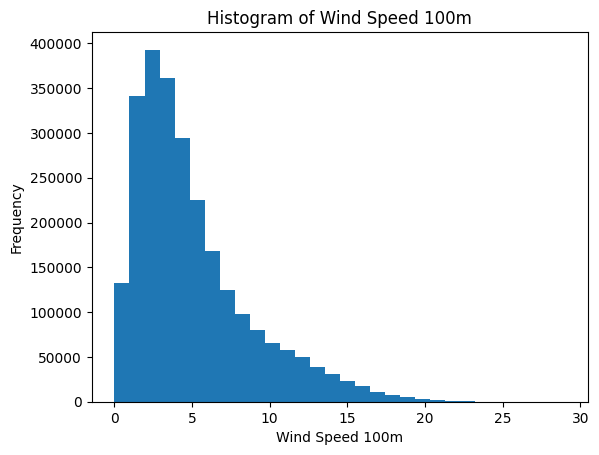

In [15]:
# Select the DataArray you want to plot
data_array = ds.Wind_Speed_100

# Create a histogram
data_array.plot.hist(bins=30)  # Adjust the number of bins as needed

# Adding labels and title for clarity
plt.xlabel('Wind Speed 100m')
plt.ylabel('Frequency')
plt.title('Histogram of Wind Speed 100m')

# Show the plot
plt.show()

In [19]:
data_array.mean()

<xarray.DataArray 'Wind_Speed_100' ()>
array(5.0344725, dtype=float32)
Coordinates:
    number   int64 0
    step     timedelta64[ns] 00:00:00
    surface  float64 0.0

In [20]:
data_array.median()

<xarray.DataArray 'Wind_Speed_100' ()>
array(3.98383, dtype=float32)
Coordinates:
    number   int64 0
    step     timedelta64[ns] 00:00:00
    surface  float64 0.0